#                             HAND WRITTEN DIGITS CLASSIFICATION
* In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network.
* We will see how accuracy improves clickly when you use convolutional neural network.

In [21]:
# IMPORTING LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

# ABOUT the MNIST ....
* The MNIST dataset is a large database of handwritten digits that is commonly used for training machine learning models. It consists of 70,000 grayscale images of handwritten digits, with 60,000 images in the training set and 10,000 images in the test set.
* Each image is 28x28 pixels in size. The MNIST dataset is a valuable resource for developing and evaluating image classification algorithms.
*  The MNIST dataset is considered to be a "clean" dataset, meaning that it is relatively free of noise and errors.
* It is a popular dataset for teaching image classification, and it has also been used to develop models for handwritten digit recognition, document analysis, and other applications
* ]



In [7]:

 (x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
print('x_train..',x_train.shape)
print('x_test...',x_test.shape)
print('y_train...',y_train.shape)
print('y_test..',y_test.shape)

x_train.. (60000, 28, 28)
x_test... (10000, 28, 28)
y_train... (60000,)
y_test.. (10000,)


* The data set is in the ratio of 6:1 which is a good propotion
* The dataset is sufficient enough to built a better model 👽👽

In [9]:
# reshapig the datasets
# the y_train,y_test are in 2D ..we Need to change them into a 1d
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [10]:
print(y_train.ndim,y_test.ndim)

1 1


In [11]:
print(x_train.ndim,x_test.ndim)

3 3


* Let's explore some of the training data sets

In [14]:
x_train[0],x_test[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

* the data values ranges between 0 to 255 which is a value for RGB colors
* hence we need to Normalise the values
# purpose of Normailsing
* Improved convergence: Normalization helps the neural network converge faster and reach a better solution.
* Reduced vanishing/exploding gradients: Normalization helps prevent the vanishing/exploding gradient problem, which can occur when the input data has a large range of values.
* Better weight initialization: Normalization makes it easier to initialize the weights of the neural network, as the weights will not be biased towards larger or smaller values.

In [15]:
# Normalize the pixel values of the test images to a range between 0 and 1.
x_train = x_train/255.0
x_test = x_test/255.0

# Model building using ANN

In [17]:
model = keras.Sequential([
        keras.layers.Flatten(),
       keras.layers.Dense(100,activation ='relu',) ,
      keras.layers.Dense(10,activation ='softmax',)
])

In [23]:
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy',metrics=['accuracy', 'mse'])

* metrics ⁉
- Accuracy: The proportion of correctly classified images to the total number of images.
- Precision: The ratio of correctly predicted positive observations to the total predicted positives.
* oprimizer ?
- RMSprop stands for Root Mean Square Propagation, which is an optimization algorithm commonly used in neural networks for training
- RMSprop adjusts the learning rate of each parameter based on the average of the magnitudes of recent gradients for that parameter. This helps in normalizing the gradients and improving the convergence of the optimization process.
* loss function..
- when dealing with classification problems where the target variable is an integer representing the class label, the "sparse_categorical_crossentropy" loss function is used.
- This loss function calculates the cross-entropy between the true distribution and the predicted distribution of the classes

In [24]:
model.fit(x_train,y_train,epochs =5,batch_size =10,)

Epoch 1/5
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2417 - accuracy: 0.9310 - mse: 27.3837
Epoch 2/5
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1292 - accuracy: 0.9639 - mse: 27.3906
Epoch 3/5
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1043 - accuracy: 0.9724 - mse: 27.3918
Epoch 4/5
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0904 - accuracy: 0.9767 - mse: 27.3924
Epoch 5/5
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0804 - accuracy: 0.9795 - mse: 27.3927


* Fro Each epoch the loss is Gradually reducing and accuracy is increasing which is a good in building a model

In [25]:
result= model.evaluate(x_test,y_test) # evaluating the model to find the performance
print('Training score',result[0])
print('Testing Score',result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1089 - accuracy: 0.9731 - mse: 27.3383
Training score 0.108914315700531
Testing Score 0.9731000065803528


#  Buliding a CNN
*  Images are typically represented as three-dimensional arrays, with dimensions corresponding to height, width, and channels.
* Reshaping the input images to a one-dimensional array reduces their dimensionality from three to one

* Improve computational efficiency: One-dimensional arrays are more computationally efficient to process than multi-dimensional arrays. This can lead to faster training and inference times for your CNN.
*   Compatibility with certain CNN architectures: Some CNN architectures, such as LeNet-5, require the input data to be in a one-dimensional format. Reshaping the input data to this format ensures that it is compatible with the chosen architecture.

In [30]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [37]:
cnn = keras.Sequential([
    layers.Conv2D(filters =64,activation ='relu',input_shape= (28,28,1),kernel_size = (3,3)),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64,activation= 'relu',kernel_size =(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), # flattenign the pixels and giving them in a single layer of input of shape(rows*columns)
    layers.Dense(1000,activation ='relu',),  # creating  teh Hidden layers
    layers.Dense(100,activation = 'relu'),
    layers.Dense(10,activation ='softmax') # softmax activation is used at the output node for multiclass classification
])

* MAXPOOLINg
 - Max pooling is often used after a convolutional layer in a CNN.
 - The convolutional layer extracts features from the input data, and the max pooling layer then reduces the dimensionality of the feature maps by selecting the most important features.
 -This helps to prevent overfitting and makes the CNN more robust to noise and variations in the input data.
 - Max pooling can also be used to reduce the computational cost of training a CNN.
* relu activation ??
-  ReLU(x) = max(0, x)
 -  It is non-linear, which allows it to learn complex relationships in the data.
 -  It is computationally efficient, which makes it suitable for large-scale neural networks.
 - It is easy to implement and train.
ReLU is often used in the hidden layers of neural networks, where it helps to introduce non-linearity and improve the network's ability to learn complex patterns.

In [39]:
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy','mse'])
# Adam optimizer is an advanced gradient-based optimizer for training deep learning models.
#  It combines the advantages of both RMSprop and SGD optimizers
cnn.fit(x_train,y_train,epochs =5,batch_size =10)

Epoch 1/5
6000/6000 [==============================] - 225s 37ms/step - loss: 0.1037 - accuracy: 0.9681 - mse: 27.3899
Epoch 2/5
6000/6000 [==============================] - 200s 33ms/step - loss: 0.0467 - accuracy: 0.9865 - mse: 27.3928
Epoch 3/5
6000/6000 [==============================] - 185s 31ms/step - loss: 0.0334 - accuracy: 0.9907 - mse: 27.3934
Epoch 4/5
6000/6000 [==============================] - 181s 30ms/step - loss: 0.0257 - accuracy: 0.9929 - mse: 27.3937
Epoch 5/5
6000/6000 [==============================] - 181s 30ms/step - loss: 0.0199 - accuracy: 0.9943 - mse: 27.3939


313/313 [==============================] - 4s 14ms/step - loss: 0.0402 - accuracy: 0.9906 - mse: 27.3395
Loss: 0.04021024703979492, Accuracy: 0.9905999898910522,mse27.339452743530273
313/313 [==============================] - 5s 16ms/step


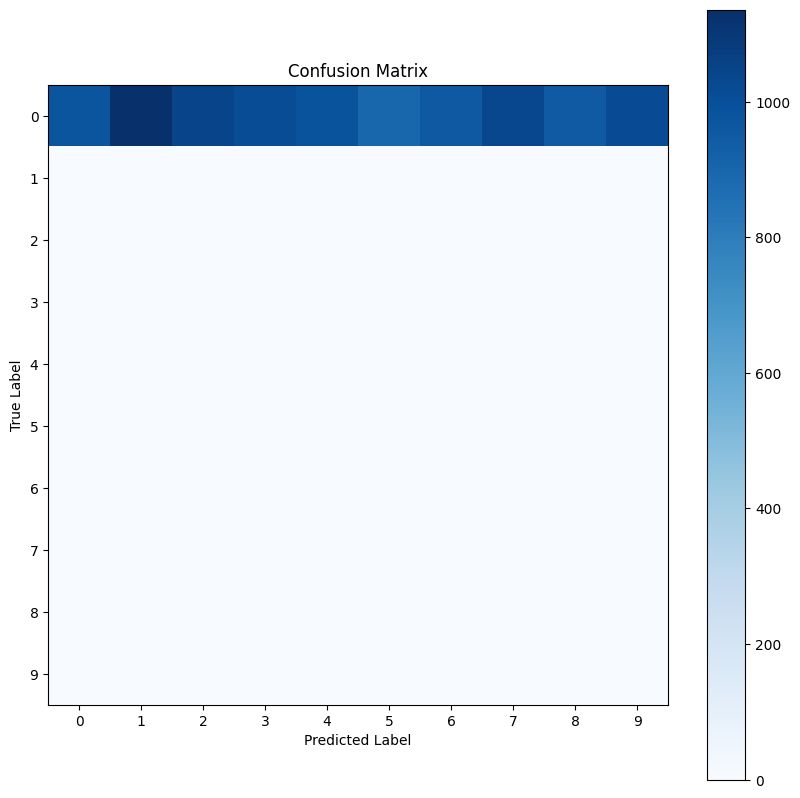

In [44]:
loss, accuracy,mse = cnn.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy},mse{mse}')

y_pred =cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = [np.argmax(i) for i in y_pred]
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10), range(10))
plt.yticks(range(10), range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


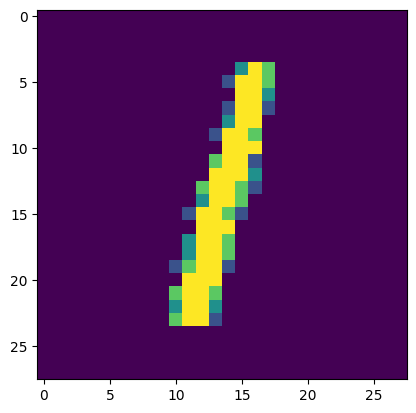

In [47]:
def images():
  index = np.random.randint(0,len(x_test))
  plt.imshow(x_test[index],cmap = '')

  plt.show()

images()

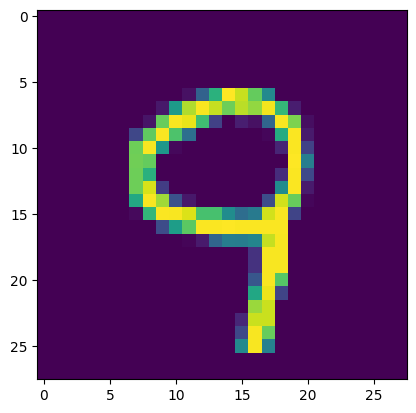

In [48]:
images()